In [32]:
import numpy as np
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [6,3]
%matplotlib notebook

This function plots the following surfaces/circles.

The circles with coordinates 

<IPython.core.display.Javascript object>


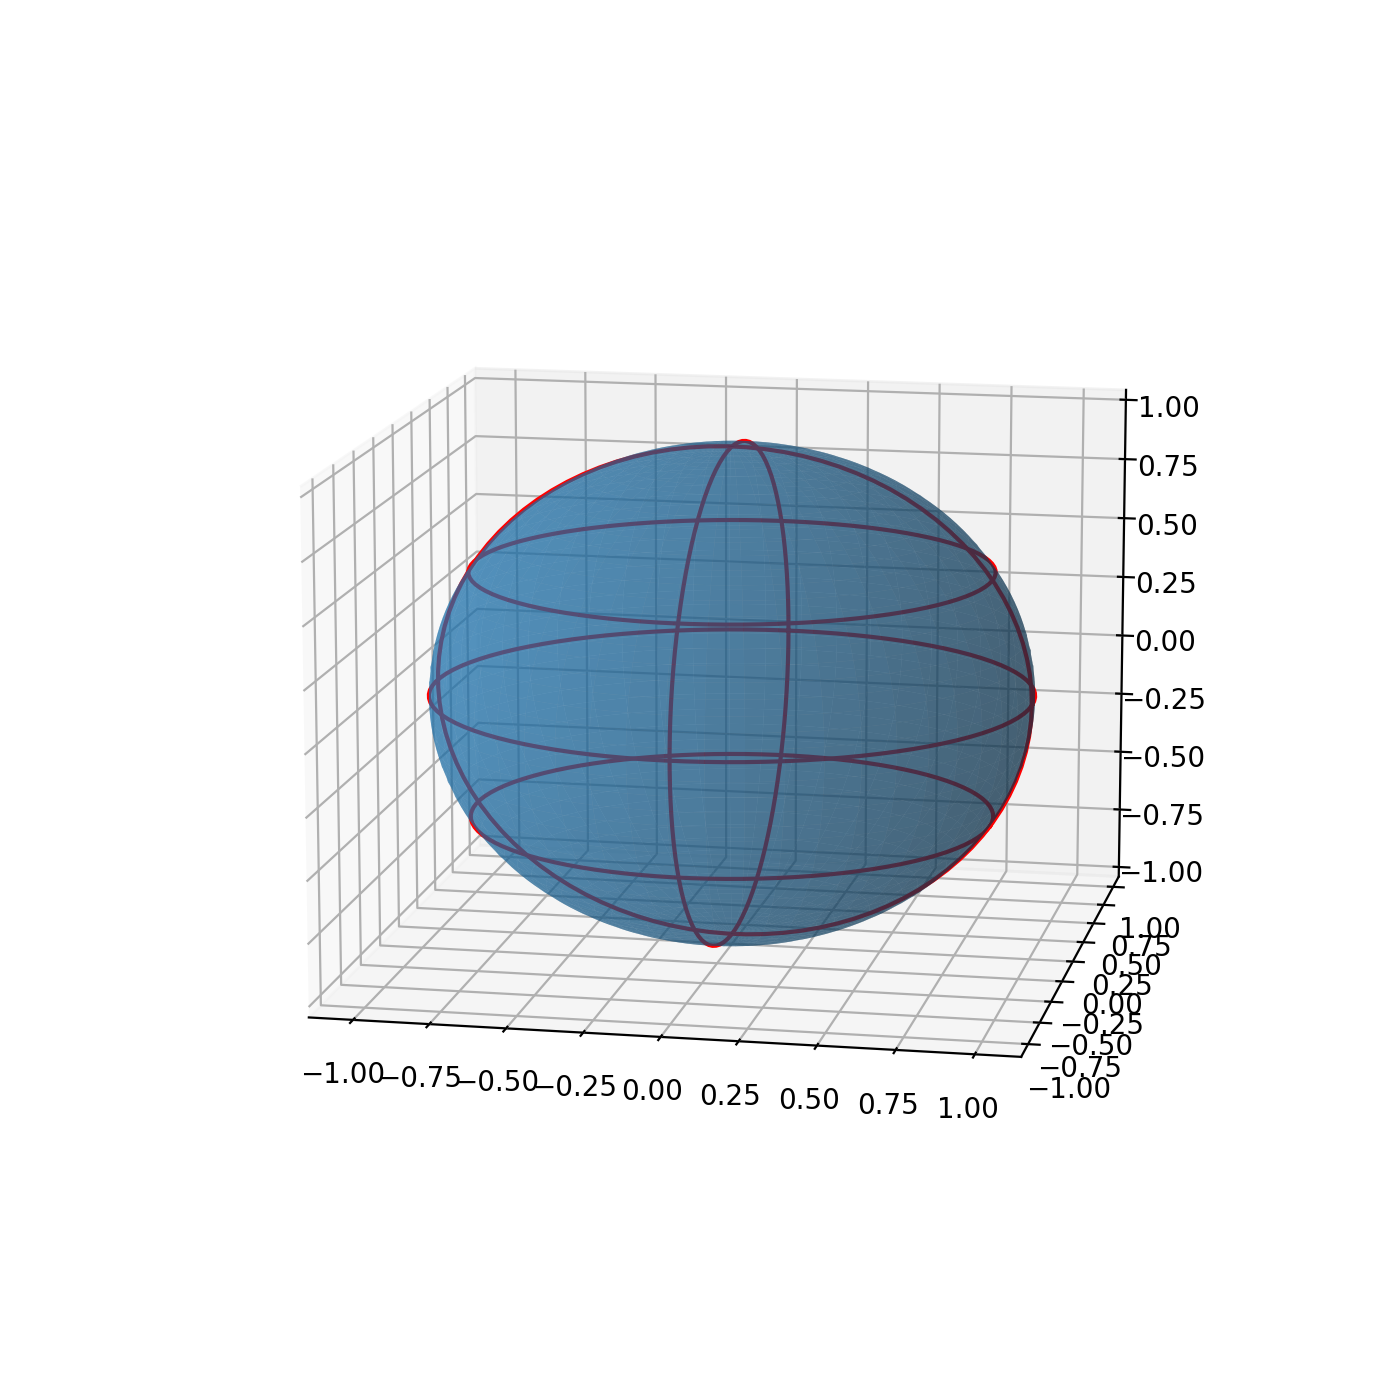

In [8]:

def random_S_n(n):
    x = np.random.normal(0,1,(1,n))[0]
    return x / np.linalg.norm(x)

def random_complex_S_n(n):
    z = random_S_n(2*n)
    z_prime = []
    for i in np.arange(0,2*n,2):
        z_prime.append(z[i]+z[i+1]*1j)
    return z_prime

fig = plt.figure(1)    
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(theta), np.sin(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.ones(np.size(theta)), np.cos(phi))

ax.plot_surface(x, y, z, linewidth=0.0, alpha = 0.5)

# equator
xline = np.cos(theta)
yline = np.sin(theta)
ax.plot3D(xline, yline, 0*theta, 'red')

# top quadrant
xline = np.sqrt(3/4)*np.cos(theta)
yline = np.sqrt(3/4)*np.sin(theta)
ax.plot3D(xline, yline, (1/2)*np.ones(100), 'red')

# bottom quadrant
xline = np.sqrt(3/4)*np.cos(theta)
yline = np.sqrt(3/4)*np.sin(theta)
ax.plot3D(xline, yline, (-1/2)*np.ones(100), 'red')

# x half
xline = np.cos(theta)
zline = np.sin(theta)
ax.plot3D(xline, np.zeros(100), zline, 'red')

# y half
yline = np.cos(theta)
zline = np.sin(theta)
ax.plot3D(np.zeros(100), yline, zline, 'red')

plt.show()


<IPython.core.display.Javascript object>


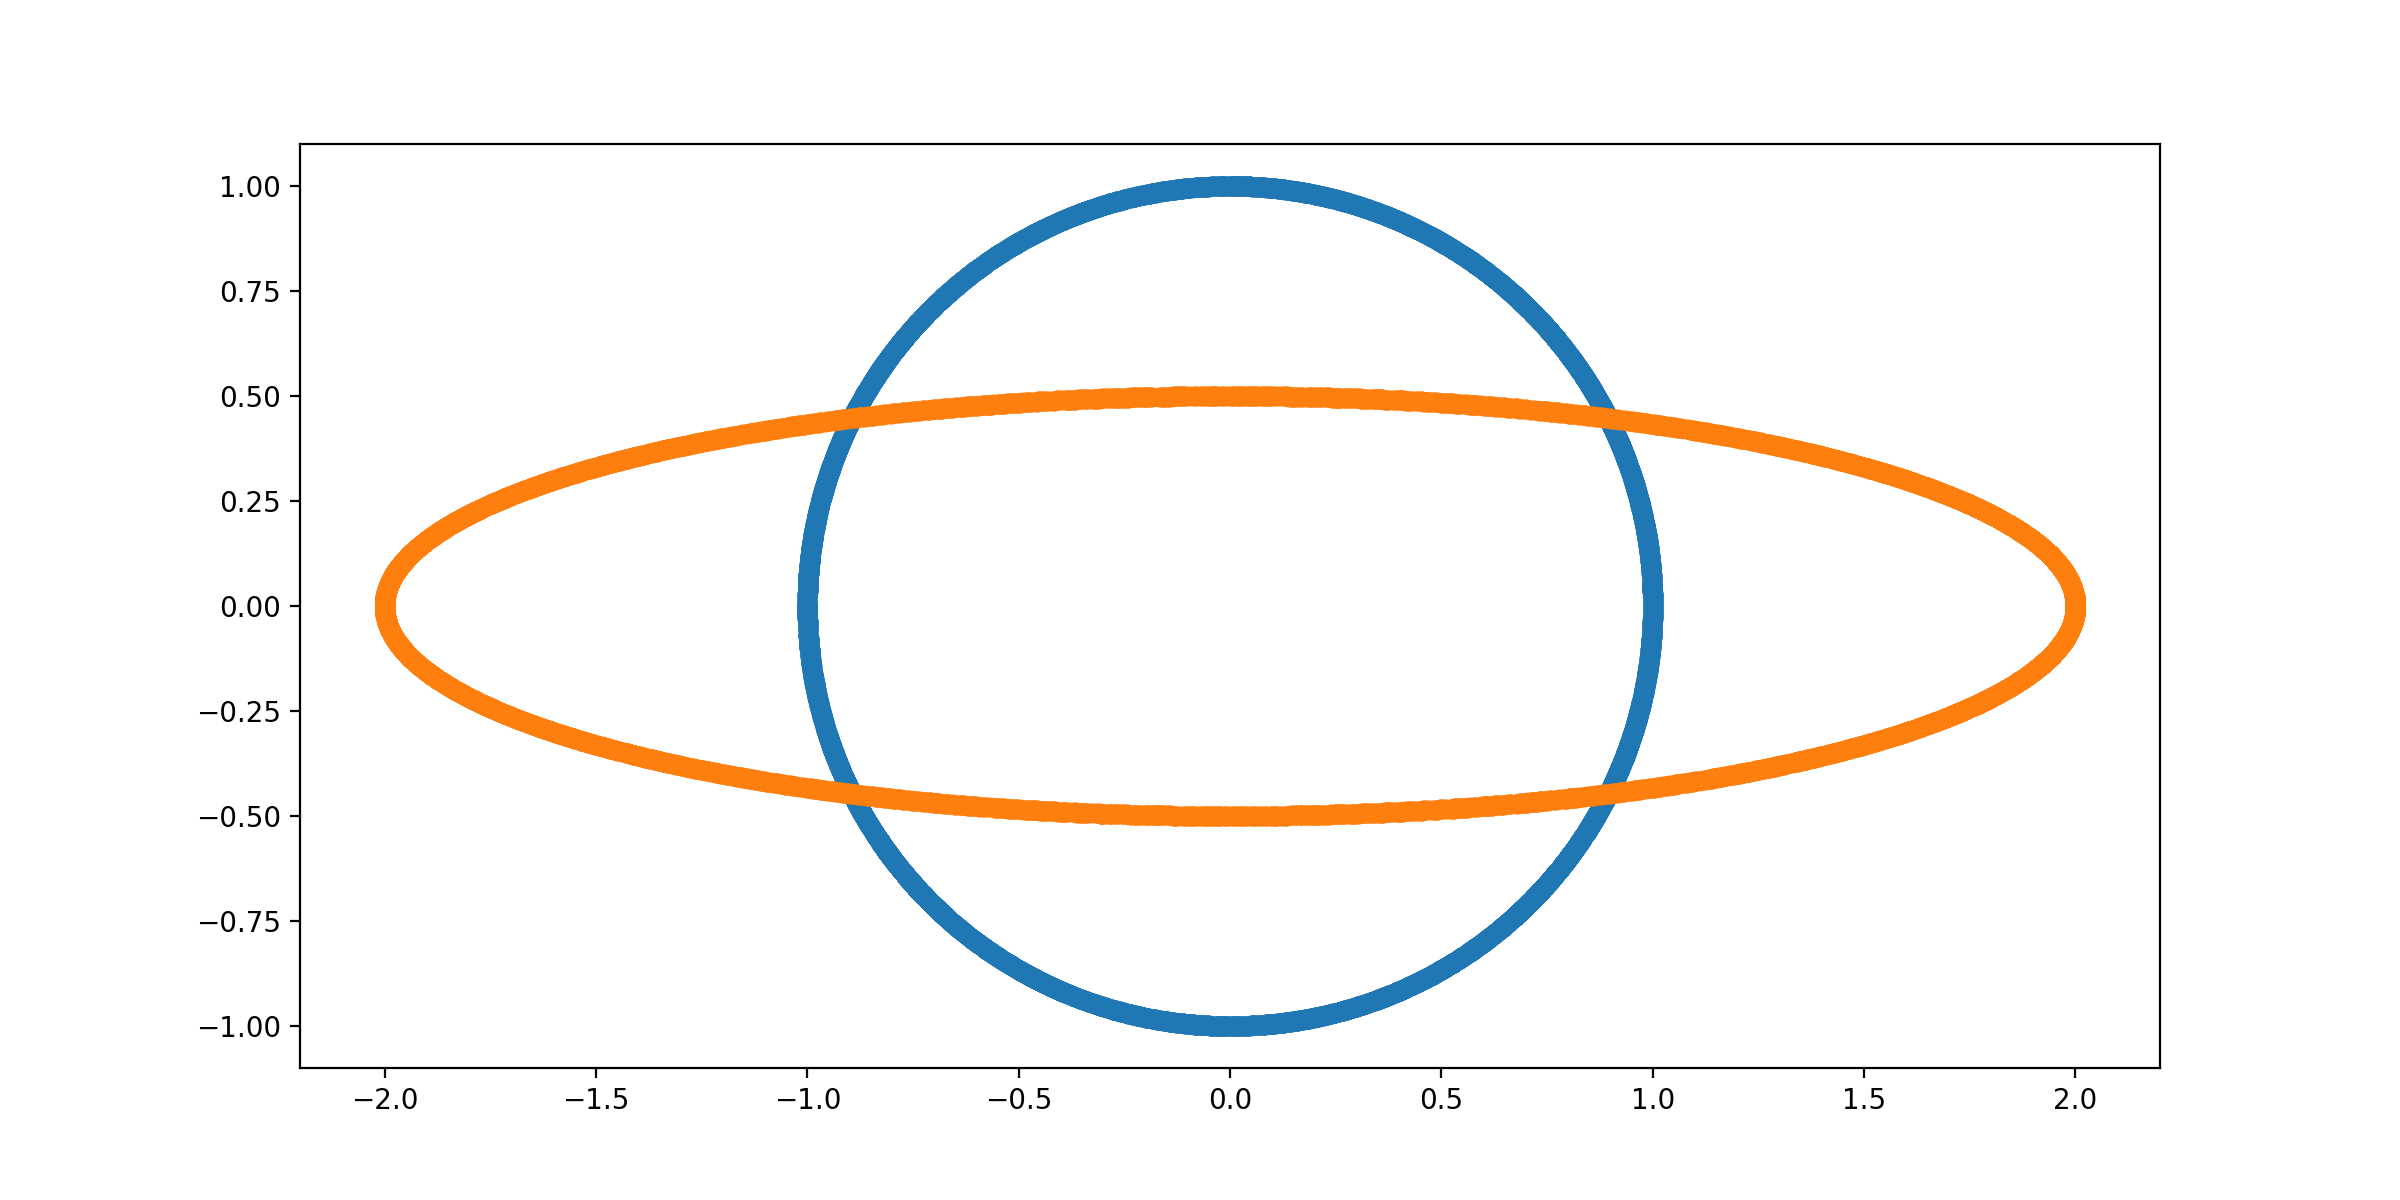

In [33]:
sphere = np.array([random_S_n(2) for i in range(10000)])
A = np.diag([2,1/2])
distorted = np.array([A@v for v in sphere])
plt.scatter(sphere[:,0], sphere[:,1])
plt.scatter(distorted[:,0], distorted[:,1])

In [34]:
def stereo_proj(X,Y):
    # X and Y are the Real and Imaginary coordinates respectively of z in C cup infty
    denominator = 1 + X**2 + Y**2
    vector = np.array([2*X, 2*Y, -1 + X**2 + Y**2])
    return vector/denominator

stereo_proj(14,13)

array([0.07650273, 0.07103825, 0.99453552])

In [10]:
def A1(x,y,z):
    if z >= 1/2 and z <= 1:
        return True
    return False

def A2(x,y,z):
    if z >= 0 and z <= 1/2:
        return True
    return False

def A3(x,y,z):
    if z >= -1/2 and z <= 0:
        return True
    return False

def A4(x,y,z):
    if z >= -1 and z <= -1/2:
        return True
    return False

def B1(x,y,z):
    if x >= 0 and y >= 0:
        return True
    return False
def B2(x,y,z):
    if x <= 0 and y >=0:
        return True
    return False
def B3(x,y,z):
    if x <= 0 and y <= 0:
        return True
    return False
def B4(x,y,z):
    if x >= 0 and y <= 0:
        return True
    return False

def coding(x,y,z):
    if A1(x,y,z) and B1(x,y,z):
        return 1
    if A1(x,y,z) and B2(x,y,z):
        return 2
    if A1(x,y,z) and B3(x,y,z):
        return 3
    if A1(x,y,z) and B4(x,y,z):
        return 4
    if A2(x,y,z) and B1(x,y,z):
        return 5
    if A2(x,y,z) and B2(x,y,z):
        return 6
    if A2(x,y,z) and B3(x,y,z):
        return 7
    if A2(x,y,z) and B4(x,y,z):
        return 8
    if A3(x,y,z) and B1(x,y,z):
        return 9
    if A3(x,y,z) and B2(x,y,z):
        return 10
    if A3(x,y,z) and B3(x,y,z):
        return 11
    if A3(x,y,z) and B4(x,y,z):
        return 12
    if A4(x,y,z) and B1(x,y,z):
        return 13
    if A4(x,y,z) and B2(x,y,z):
        return 14
    if A4(x,y,z) and B3(x,y,z):
        return 15
    if A4(x,y,z) and B4(x,y,z):
        return 16

# Check coding of sphere

In [11]:

def random_point_on_sphere(n):
  # samples from n-1 sphere in space
    X = np.random.default_rng().normal(size=(1 , n))[0]
    return X/np.linalg.norm(X)

In [ ]:
points = [random_point_on_sphere(3) for i in range(1000000)]
coding_uniform = [coding(p[0],p[1],p[2]) for p in points]

In [ ]:
plt.hist(coding_uniform, bins = 16)
plt.title("histogram of gaussian points on sphere (a.k.a uniform)")
plt.xlabel("coding")
plt.ylabel("count")

In [12]:
def normalize_vector(v):
    return v/v[0]

v = np.array([3 + 2j, 19])
normalize_vector(v)

array([1.        +0.j        , 4.38461538-2.92307692j])

In [ ]:
np.random.rand()

In [ ]:
stereo_proj(5*np.random.rand(), 5*np.random.rand())

In [ ]:


fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection ="3d")
   
stereo_expand = np.array([stereo_proj(np.random.choice([-1,1])*5*np.random.rand(), np.random.choice([-1,1])*5*np.random.rand()) for i in range(100000)])

 
 
sctt = ax.scatter3D(stereo_expand[:,0], stereo_expand[:,1], stereo_expand[:,2],
                    alpha = 0.8,
                    color = "blue")
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')

# show plot
plt.show()

# experiment

In [13]:
A = np.diag([2,1/2])
A

array([[2. , 0. ],
       [0. , 0.5]])

In [14]:
U = unitary_group.rvs(2)
M = U @ A
eigenvalues, eigenvectors = np.linalg.eig(M)
norm_eigenvalues = np.abs(eigenvalues)
np.linalg.inv(eigenvectors)@M@eigenvectors

array([[-1.73125403e+00+7.13848982e-01j,  2.22044605e-16-2.77555756e-17j],
       [ 3.19189120e-16+8.32667268e-17j,  5.33993187e-01-3.13669504e-03j]])

In [15]:
eigenvalues

array([-1.73125403+0.71384898j,  0.53399319-0.0031367j ])

In [16]:
def experiment(A, num_trials = 100000):
    n = len(A)
    expanding = []
    contracting = []
    expand_coord = []
    contract_coord = []
    for i in range(num_trials):
        boolean = True
        while boolean:
            v = random_complex_S_n(2)
            if np.linalg.norm(A@v) >= 1:
                v = v[1]/v[0]
                boolean = False
        random = stereo_proj(v.real, v.imag)
        U = unitary_group.rvs(2)
        M = U @ A
        eigenvalues, eigenvectors = np.linalg.eig(M)
        norm_eigenvalues = np.abs(eigenvalues)
        if max(norm_eigenvalues) >= 1:
            expanding_evector = normalize_vector(eigenvectors[:,np.argmax(norm_eigenvalues)])
            contracting_evector = normalize_vector(eigenvectors[:,np.argmin(norm_eigenvalues)])
            z_expanding = expanding_evector[1]
            z_contracting = contracting_evector[1]


            stereo_expand = stereo_proj(z_expanding.real, z_expanding.imag)
            stereo_contract = stereo_proj(z_contracting.real, z_contracting.imag)


            x_ex = stereo_expand[0]
            y_ex = stereo_expand[1]
            z_ex = stereo_expand[2]

            expand_coord.append(stereo_expand)
            contract_coord.append(stereo_contract)


            coding_expand = coding(x_ex, y_ex, z_ex)
            contract_coding = coding(random[0],random[1],random[2])
            contracting.append(contract_coding)
            expanding.append(coding_expand)
    return expanding, contracting, expand_coord, contract_coord

expand_coding, contract_coding, expand_coord, contract_coord = experiment(A)

<IPython.core.display.Javascript object>


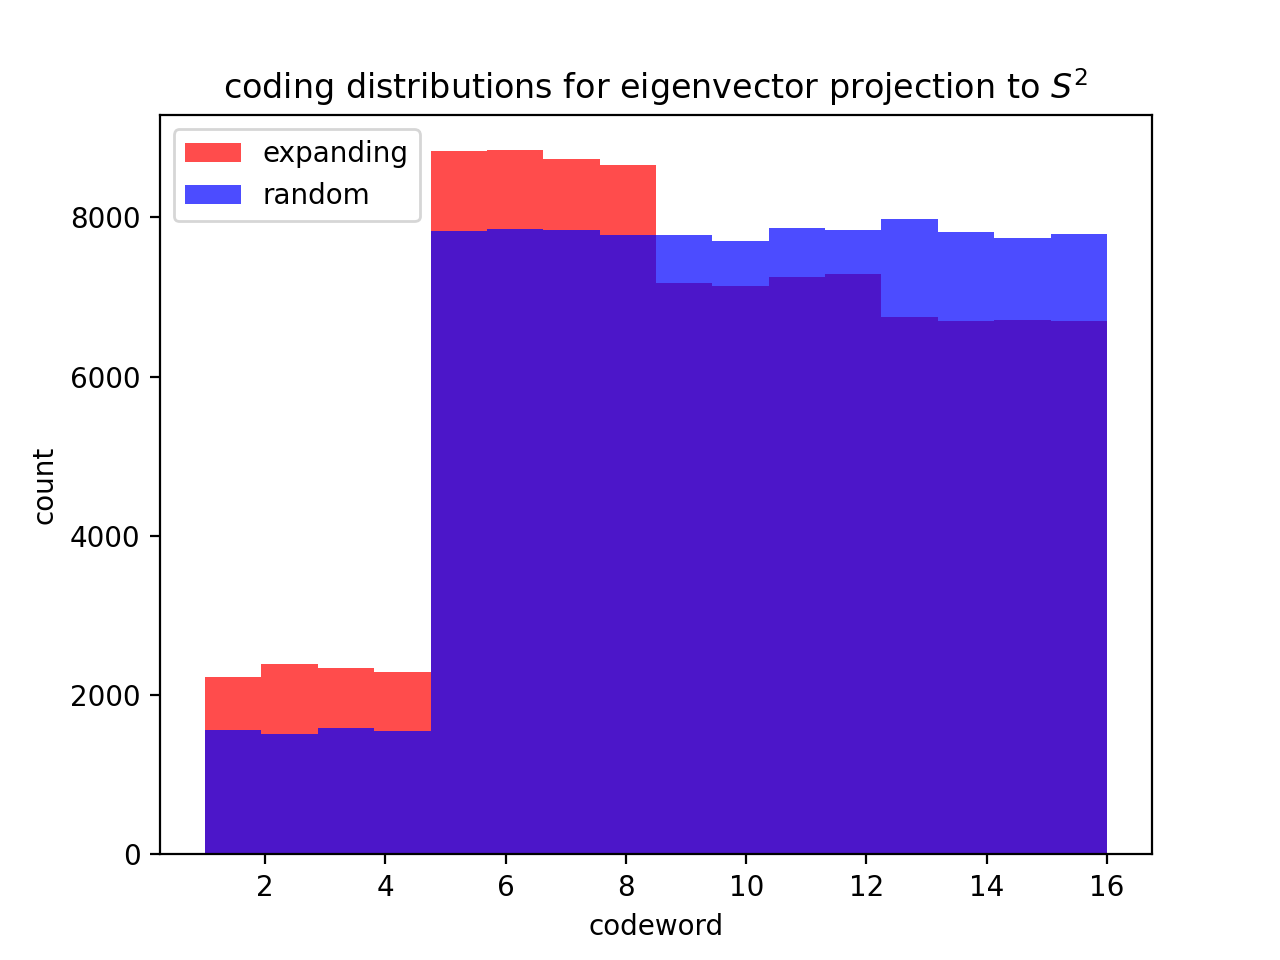

Text(0, 0.5, 'count')

In [65]:
plt.hist(expand_coding, bins = 16, color = "red", alpha = 0.7, label = "expanding")
plt.hist(contract_coding, bins = 16, color = "blue", alpha = 0.7, label = "random")
plt.legend()
plt.title("coding distributions for eigenvector projection to $S^2$")
plt.xlabel("codeword")
plt.ylabel("count")

<IPython.core.display.Javascript object>


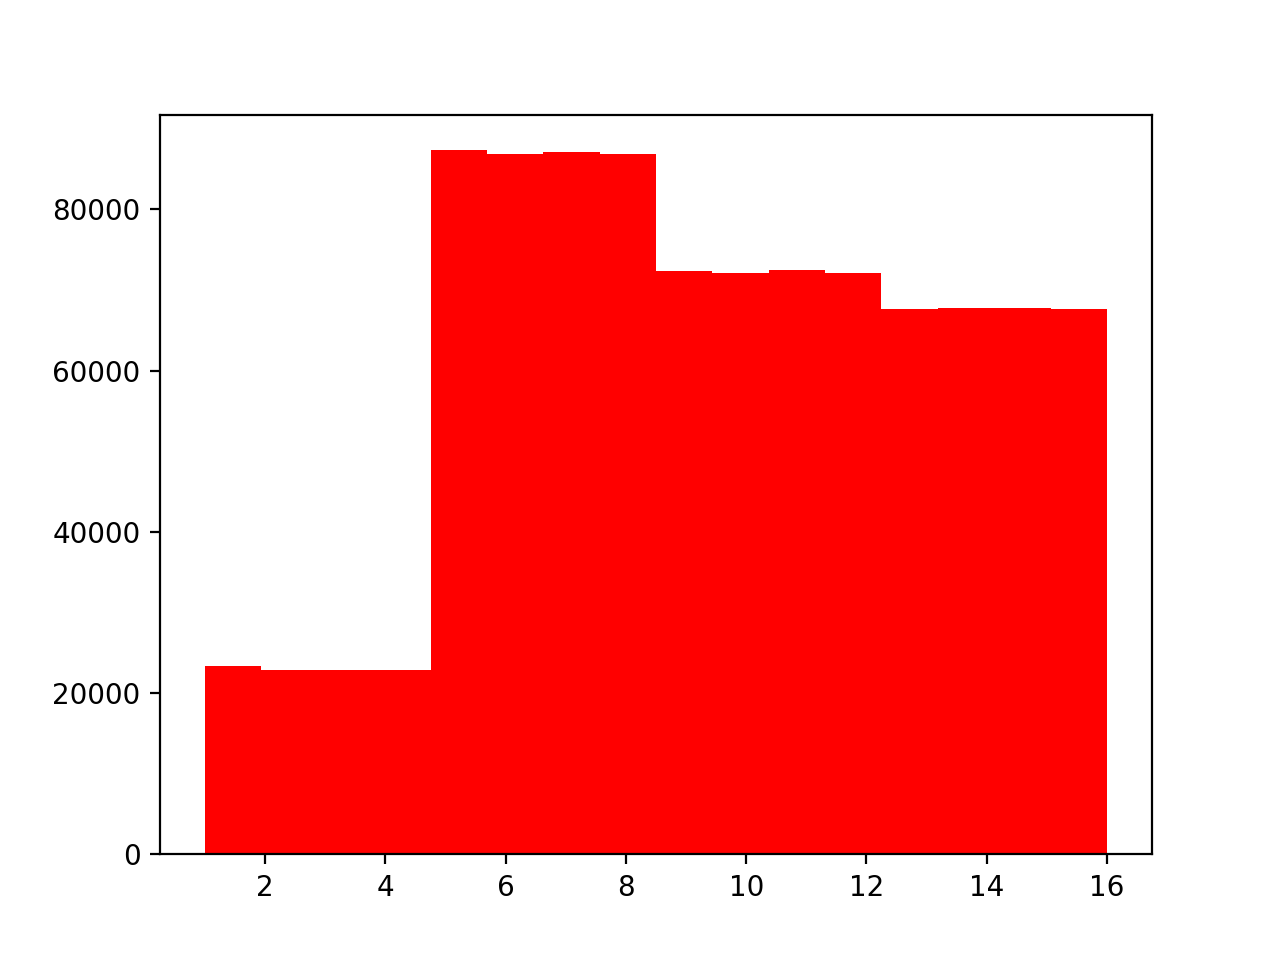

(array([23347., 22863., 22836., 22819., 87316., 86859., 87158., 86822.,
        72382., 72139., 72498., 72151., 67656., 67760., 67798., 67596.]),
 array([ 1.    ,  1.9375,  2.875 ,  3.8125,  4.75  ,  5.6875,  6.625 ,
         7.5625,  8.5   ,  9.4375, 10.375 , 11.3125, 12.25  , 13.1875,
        14.125 , 15.0625, 16.    ]),
 <BarContainer object of 16 artists>)

In [156]:
plt.hist(expand_coding, bins = 16, color = "red", label = "expanding")

<IPython.core.display.Javascript object>


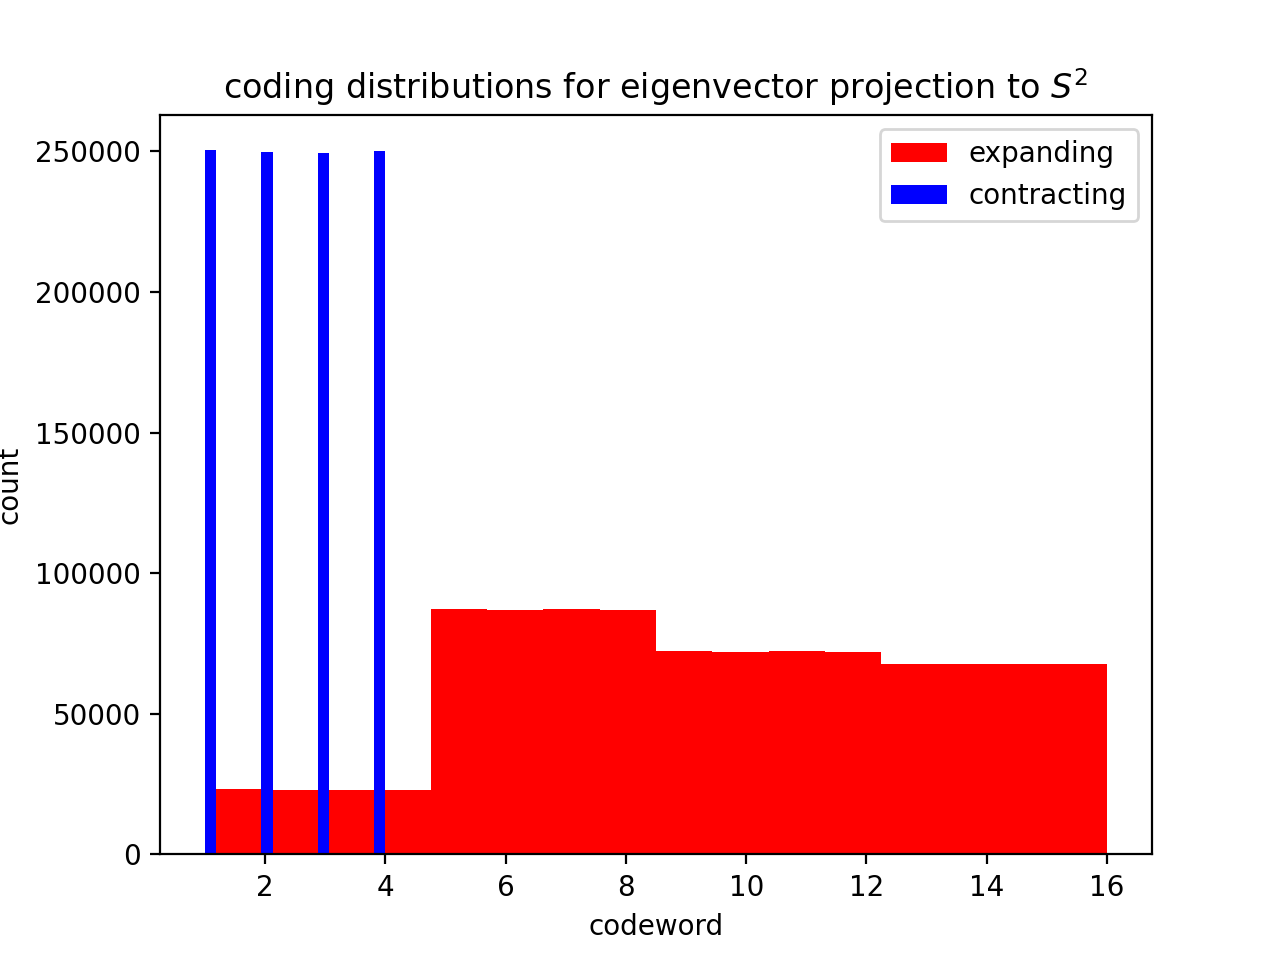

Text(0, 0.5, 'count')

In [158]:
plt.hist(expand_coding, bins = 16, color = "red", label = "expanding")
plt.hist(contract_coding, bins = 16, color = "blue", label = "contracting")
plt.legend()
plt.title("coding distributions for eigenvector projection to $S^2$")
plt.xlabel("codeword")
plt.ylabel("count")

In [17]:
l1 = np.array(expand_coding)
np.unique(l1, return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([2318, 2235, 2350, 2316, 8864, 8842, 8706, 8657, 7085, 7171, 7241,
        7230, 6704, 6808, 6713, 6760]))

In [18]:
l2 = np.array(contract_coding)
np.unique(l2, return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([1536, 1534, 1568, 1601, 7702, 7895, 7836, 7908, 7715, 7863, 7755,
        7745, 7813, 7878, 7840, 7811]))

<IPython.core.display.Javascript object>


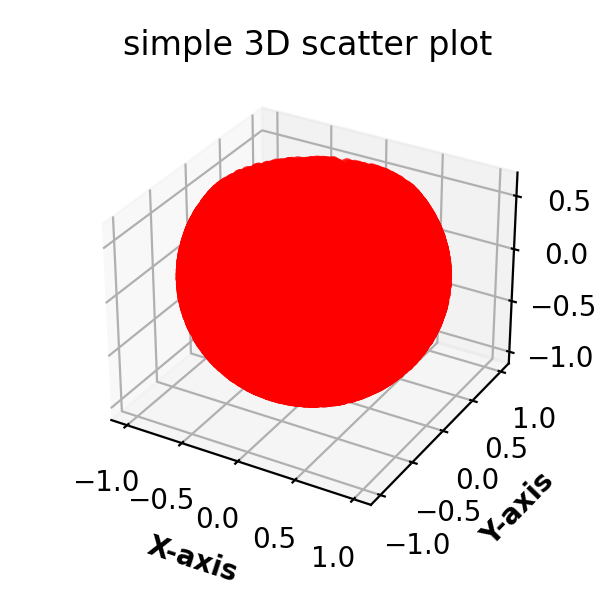

In [169]:


expand_coding, contract_coding, expand_coord, contract_coord = experiment(A,10000)


expand_coord = np.array(expand_coord)
fig = plt.figure(figsize = (3,3))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
 
# Creating plot
sctt = ax.scatter3D(expand_coord[:,0], expand_coord[:,1], expand_coord[:,2],
                    alpha = 0.8,
                    color = "red")
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')

# show plot
plt.show()

<IPython.core.display.Javascript object>


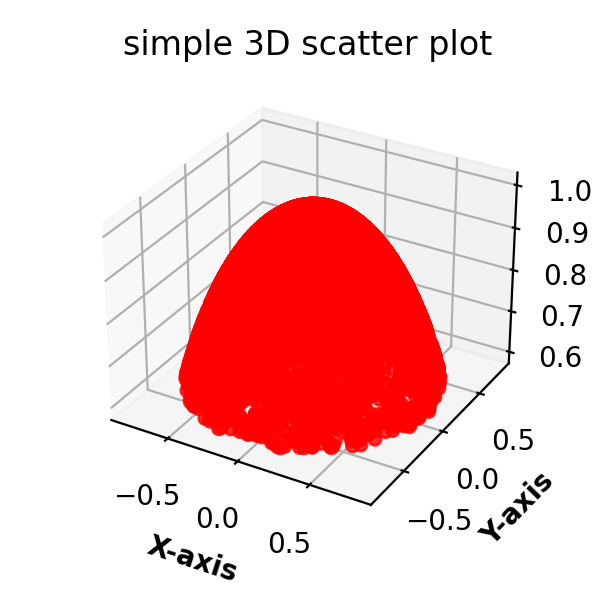

In [170]:
contract_coord = np.array(contract_coord)
fig = plt.figure(figsize = (3,3))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
 
# Creating plot
sctt = ax.scatter3D(contract_coord[:,0], contract_coord[:,1], contract_coord[:,2],
                    alpha = 0.8,
                    color = "red")
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')

# show plot
plt.show()

<IPython.core.display.Javascript object>


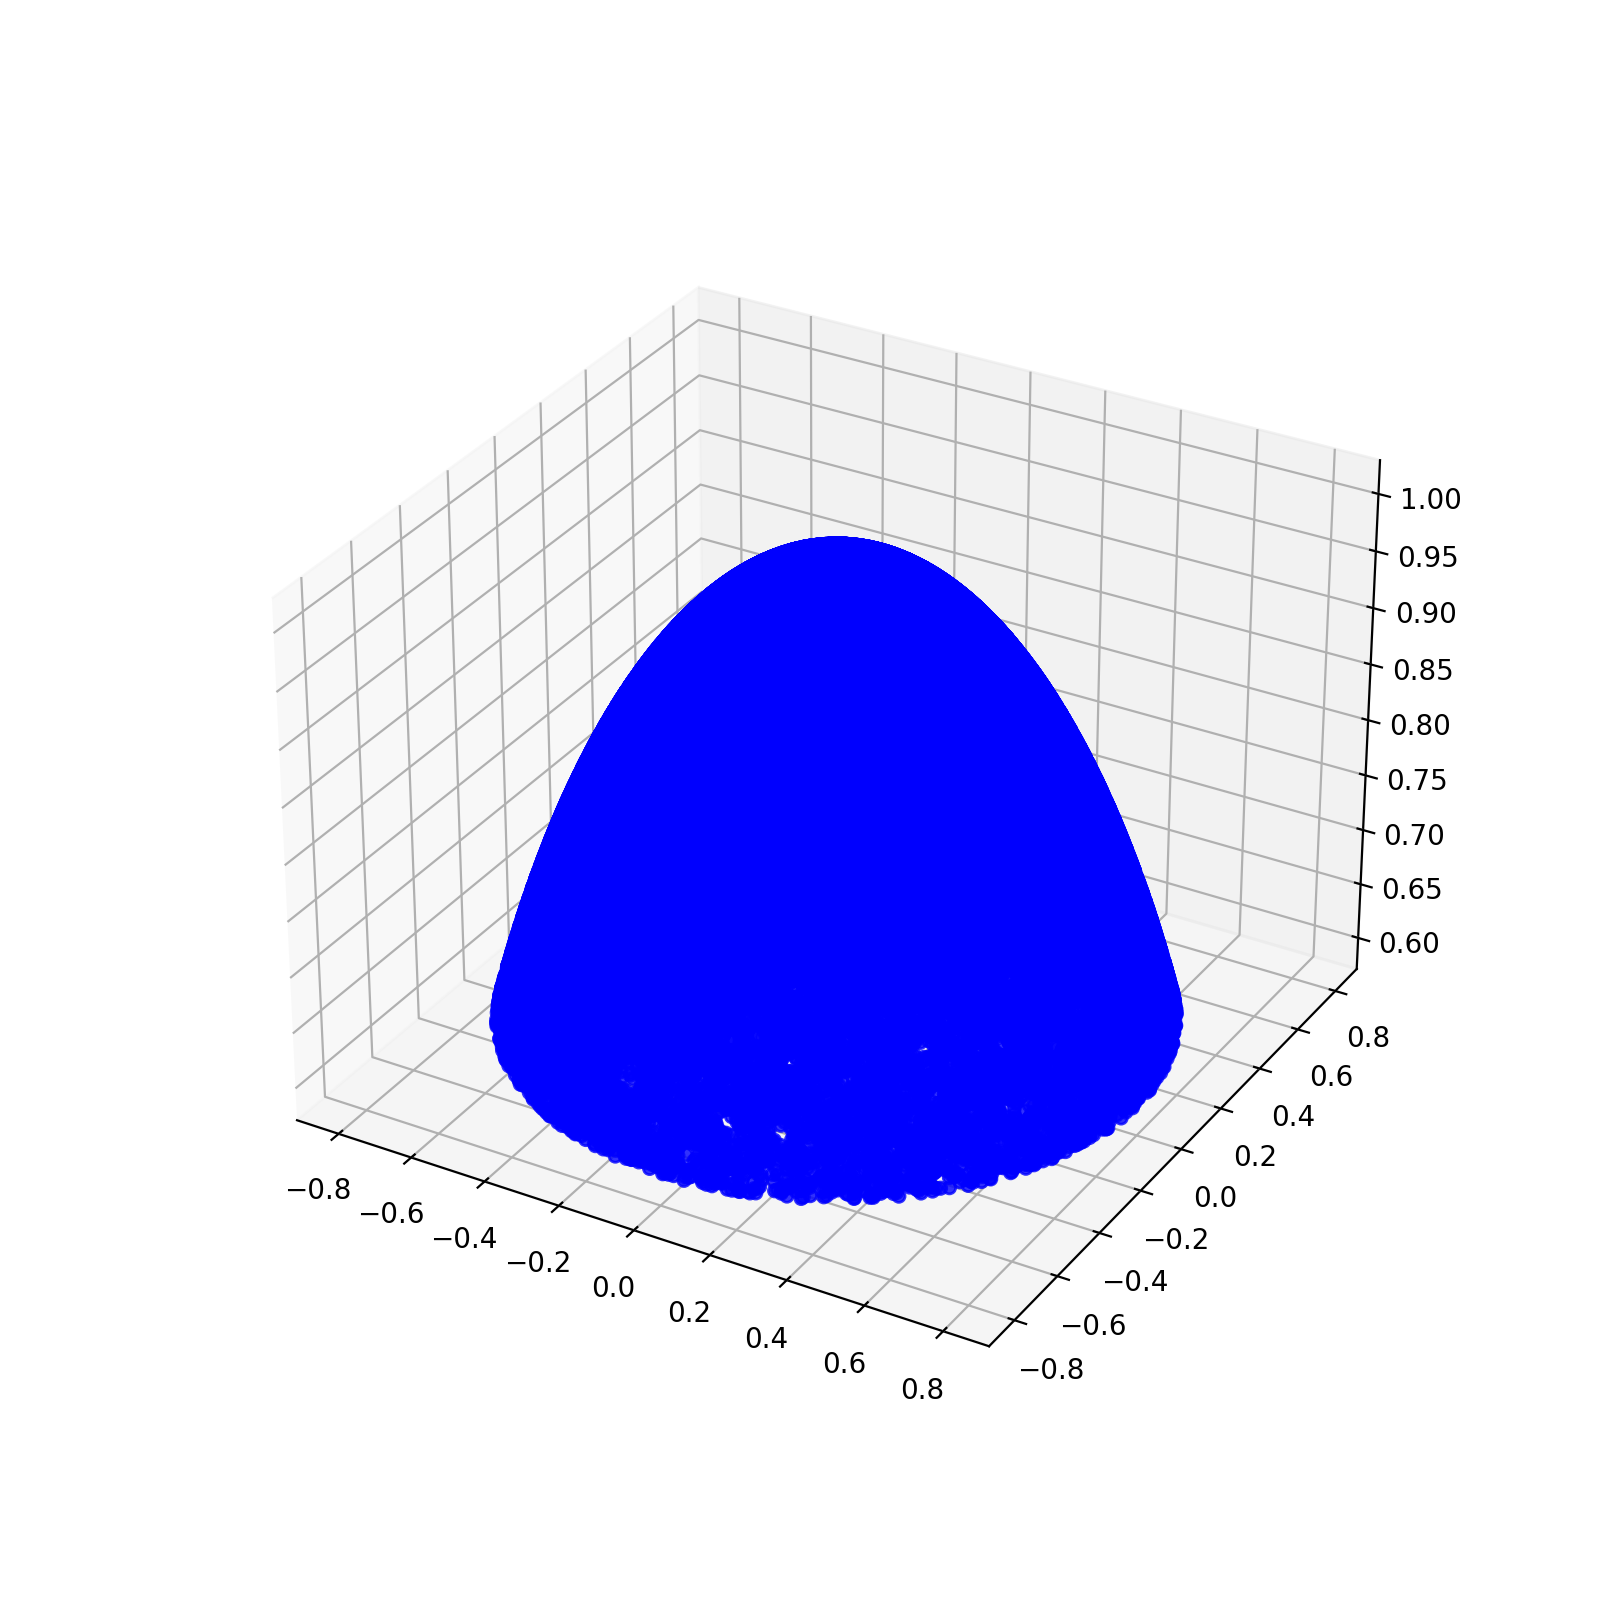

TypeError: list indices must be integers or slices, not tuple

In [19]:
contract_coord = np.array(contract_coord)
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
 
# Creating plot
ax.scatter3D(contract_coord[:,0], contract_coord[:,1], contract_coord[:,2],
                    alpha = 0.8,
                    color = "blue",
                   label = "contract")

# Creating plot
ax.scatter3D(expand_coord[:,0], expand_coord[:,1], expand_coord[:,2],
                    alpha = 0.8,
                    color = "red",
                   label = "expand")
 
plt.title("eigenvector picture for UA = Diag([2,1/2])")

ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.legend()

# show plot
plt.show()

Question. What happens if we do the same exercise for O(3)

In [10]:
from scipy.stats import ortho_group
A = np.diag([3,2,1/6])

In [18]:
def experiment(A, num_trials = 100000):
    n = len(A)
    expanding = []
    contracting = []
    expand_coord = []
    contract_coord = []
    for i in range(num_trials):
        U = unitary_group.rvs(n)
        M = U @ A
        eigenvalues, eigenvectors = np.linalg.eig(M)
        norm_eigenvalues = np.abs(eigenvalues)
        expanding_evector = normalize_vector(eigenvectors[:,np.argmax(norm_eigenvalues)])
        contracting_evector = normalize_vector(eigenvectors[:,np.argmin(norm_eigenvalues)])
        z_expanding = expanding_evector[1]
        z_contracting = contracting_evector[1]
        
        
        stereo_expand = stereo_proj(z_expanding.real, z_expanding.imag)
        stereo_contract = stereo_proj(z_contracting.real, z_contracting.imag)
        
        
        x_ex = stereo_expand[0]
        y_ex = stereo_expand[1]
        z_ex = stereo_expand[2]
        
        expand_coord.append(stereo_expand)
        contract_coord.append(stereo_contract)
        
        x_cont = stereo_contract[0]
        y_cont = stereo_contract[1]
        z_cont = stereo_contract[2]
        
        coding_expand = coding(x_ex, y_ex, z_ex)
        coding_contract = coding(x_cont, y_cont, z_cont)
        expanding.append(coding_expand)
        contracting.append(coding_contract)
    return expanding, contracting, expand_coord, contract_coord

expand_coding, contract_coding, expand_coord, contract_coord = experiment(A, 5000)

<IPython.core.display.Javascript object>


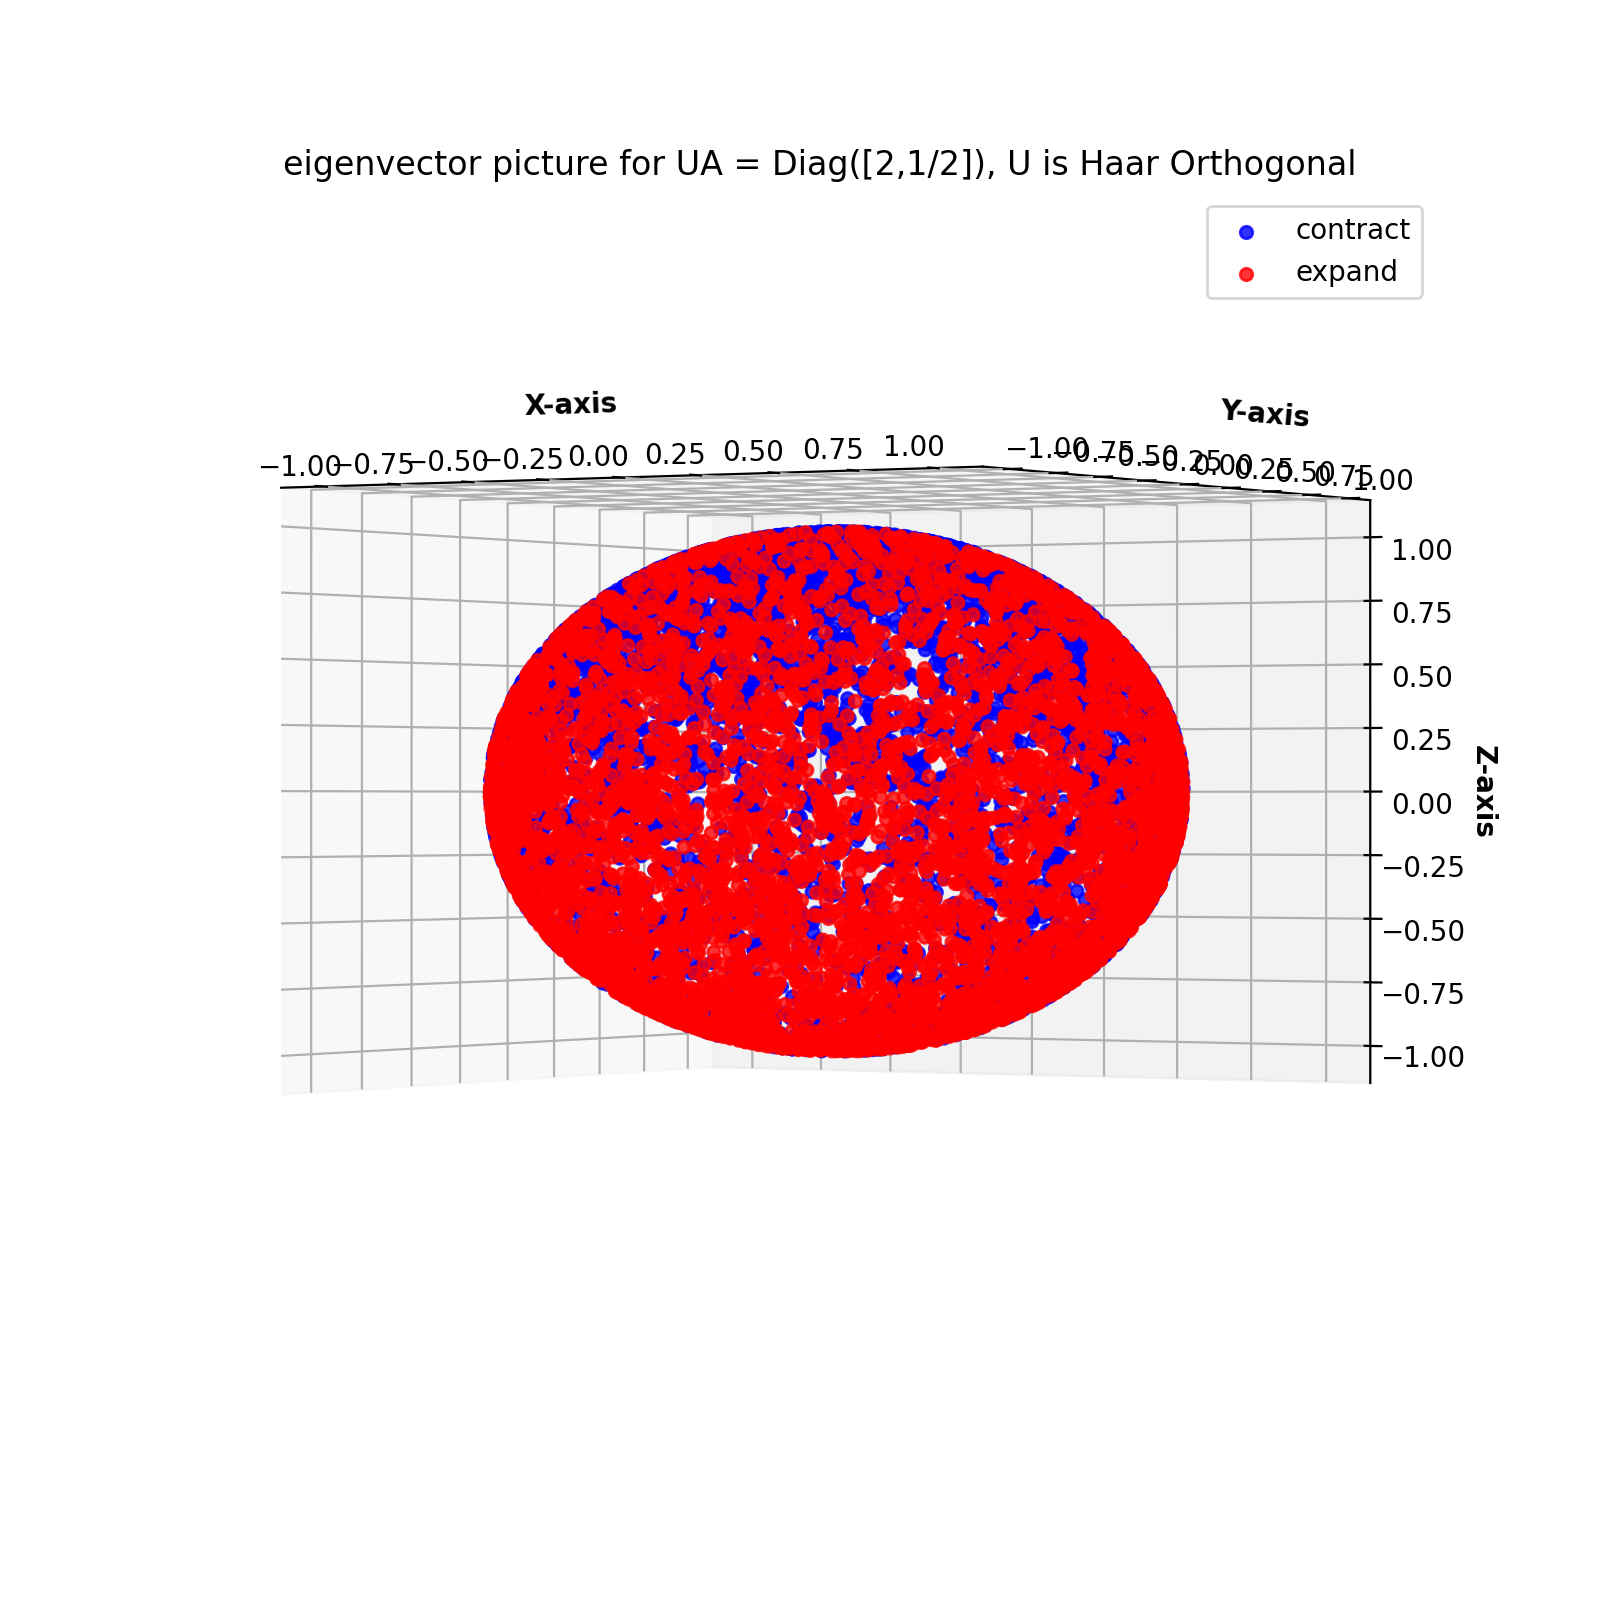

In [19]:
contract_coord = np.array(contract_coord)
expand_coord = np.array(expand_coord)
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
 
# Creating plot
ax.scatter3D(contract_coord[:,0], contract_coord[:,1], contract_coord[:,2],
                    alpha = 0.8,
                    color = "blue",
                   label = "contract")

# Creating plot
ax.scatter3D(expand_coord[:,0], expand_coord[:,1], expand_coord[:,2],
                    alpha = 0.8,
                    color = "red",
                   label = "expand")
 
plt.title("eigenvector picture for UA = Diag([2,1/2]), U is Haar Orthogonal")

ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.legend()

# show plot
plt.show()

<IPython.core.display.Javascript object>


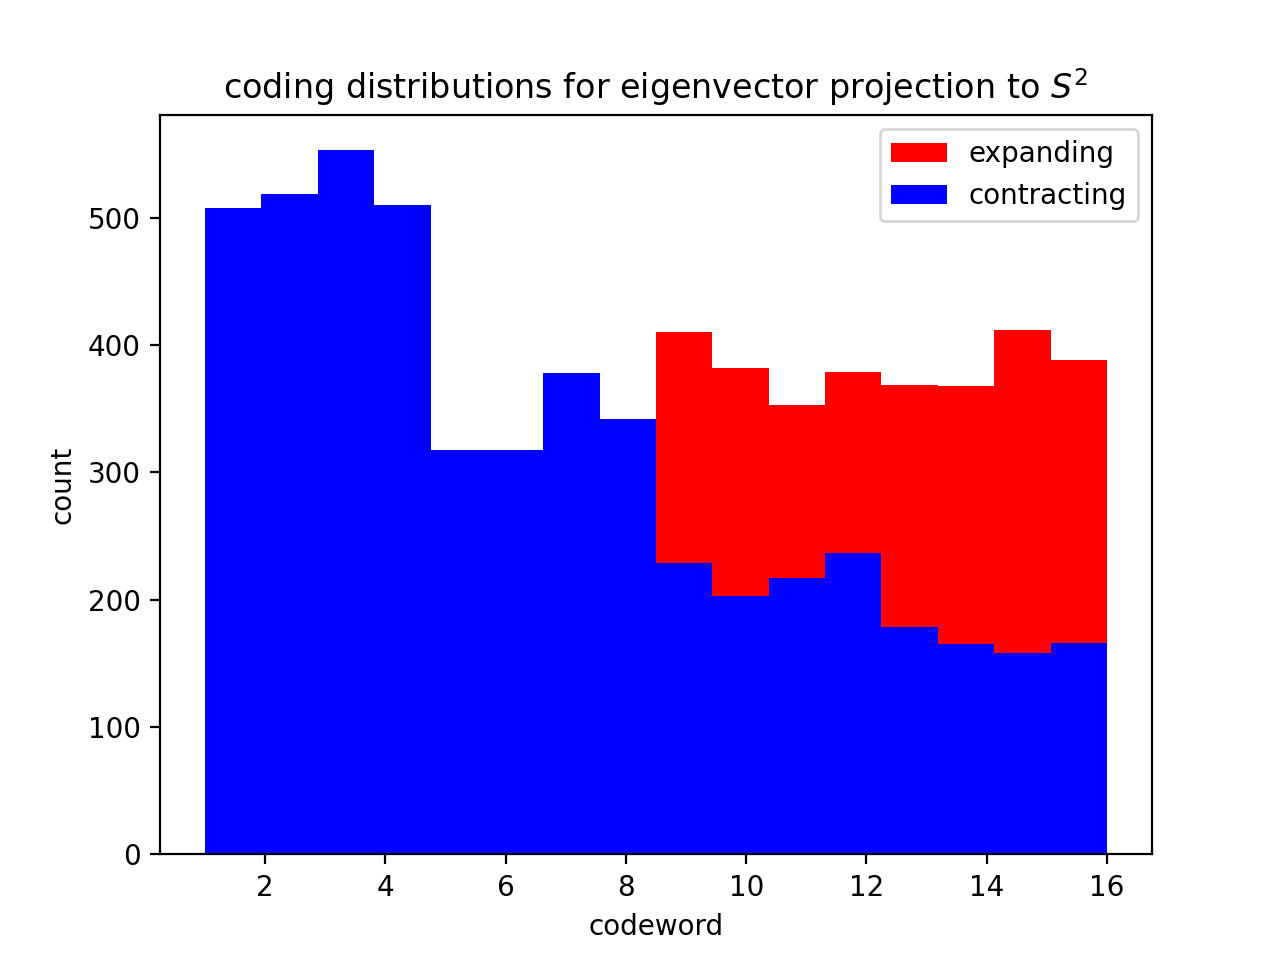

Text(0, 0.5, 'count')

In [20]:
plt.hist(expand_coding, bins = 16, color = "red", label = "expanding")
plt.hist(contract_coding, bins = 16, color = "blue", label = "contracting")
plt.legend()
plt.title("coding distributions for eigenvector projection to $S^2$")
plt.xlabel("codeword")
plt.ylabel("count")

In [120]:
A = np.diag([2,1/2])
U = ortho_group.rvs(2)
M = U@A
eigenvalues, eigenvectors = np.linalg.eig(M)
eigenvectors

array([[-0.76705102, -0.20468095],
       [ 0.64158611, -0.97882874]])

In [175]:
A = np.diag([5,3,1,1/15])
expand_coding, contract_coding, expand_coord, contract_coord = experiment(A, 10000)

<IPython.core.display.Javascript object>


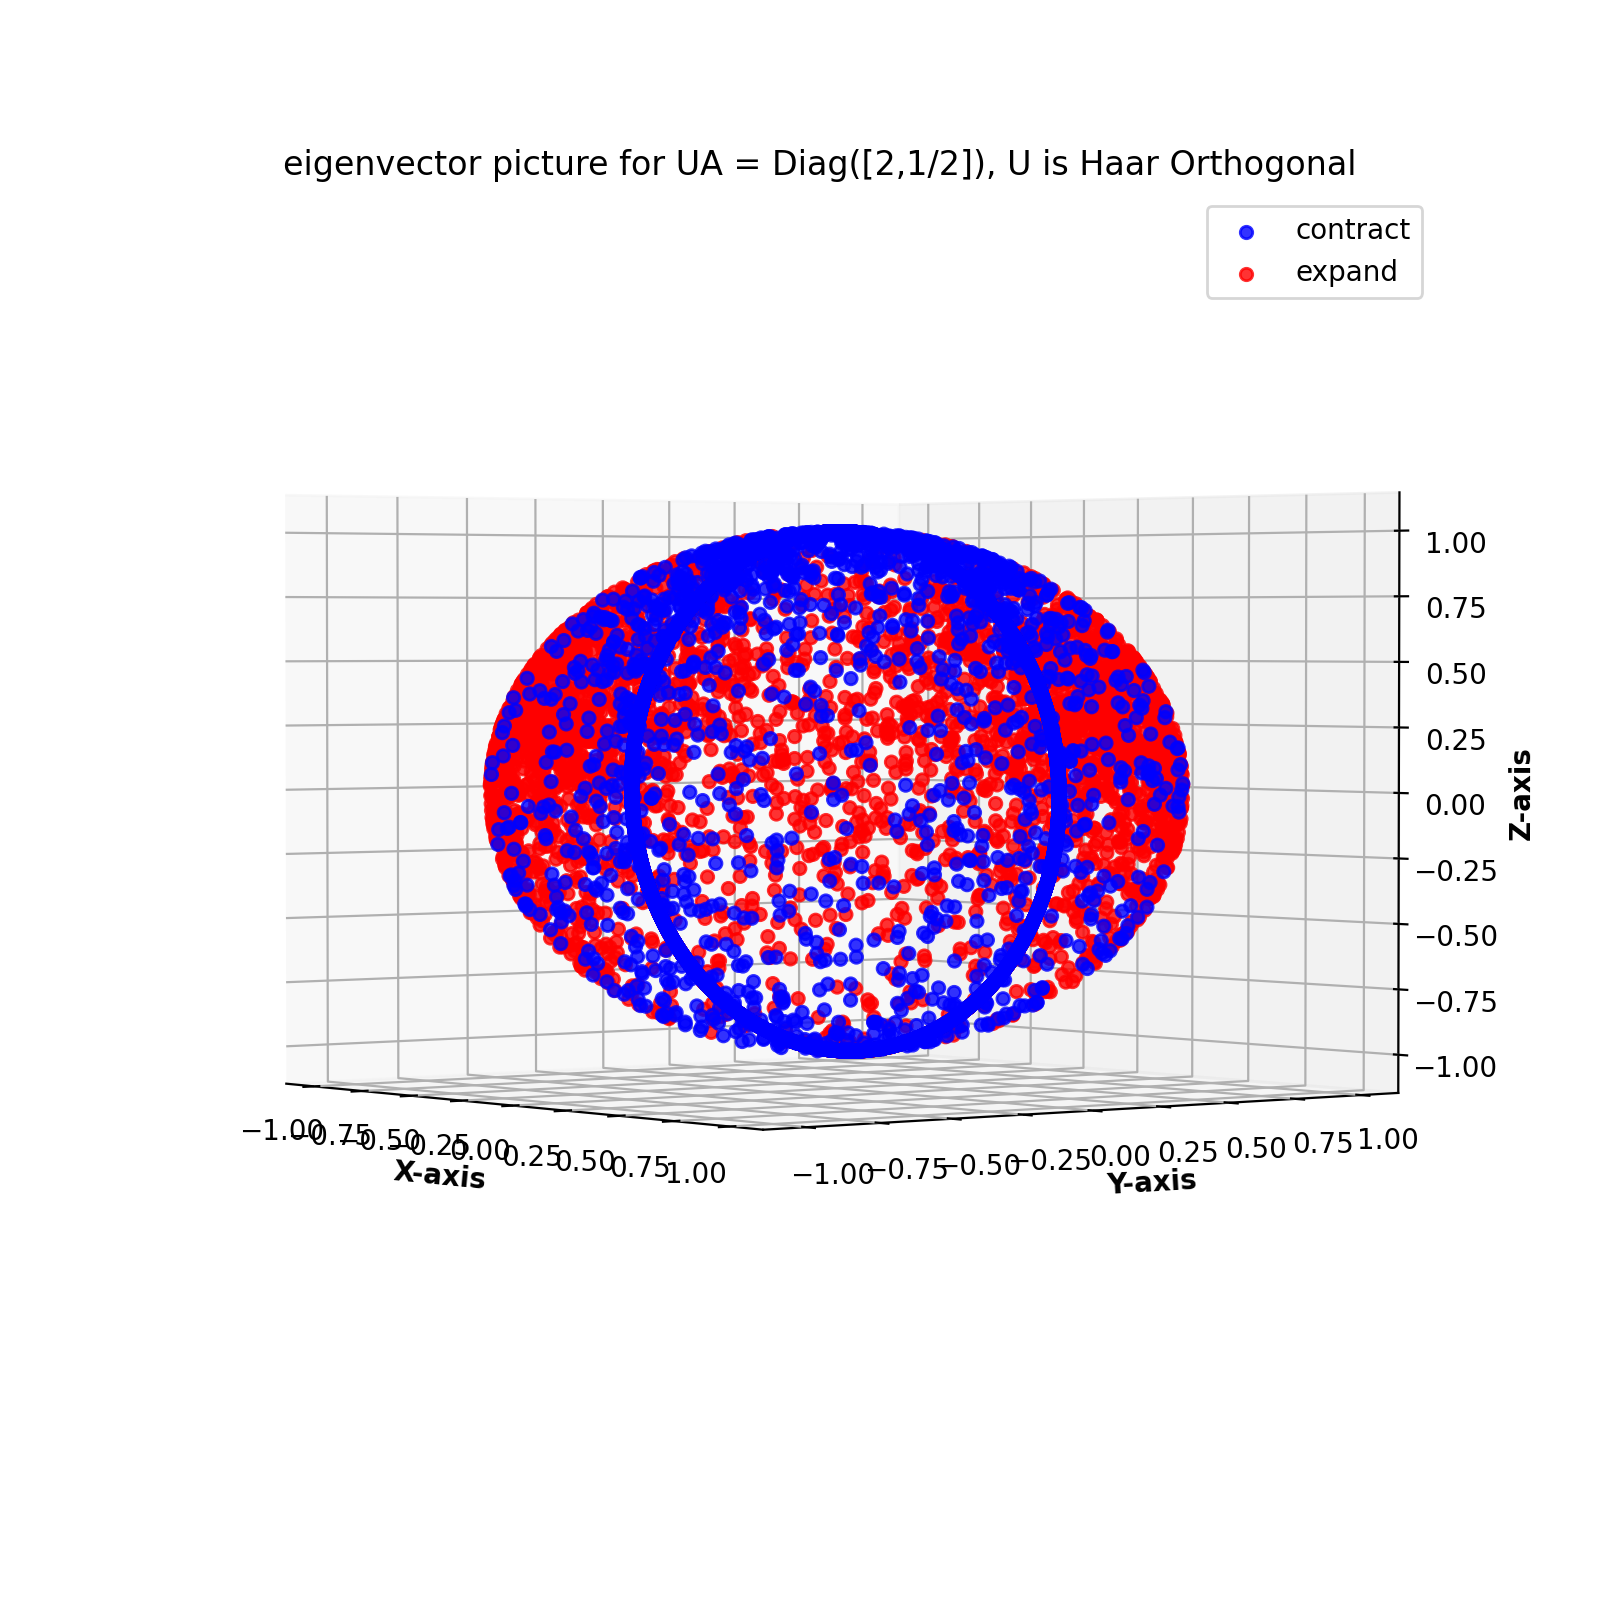

In [176]:
contract_coord = np.array(contract_coord)
expand_coord = np.array(expand_coord)
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
 
# Creating plot
ax.scatter3D(contract_coord[:,0], contract_coord[:,1], contract_coord[:,2],
                    alpha = 0.8,
                    color = "blue",
                   label = "contract")

# Creating plot
ax.scatter3D(expand_coord[:,0], expand_coord[:,1], expand_coord[:,2],
                    alpha = 0.8,
                    color = "red",
                   label = "expand")
 
plt.title("eigenvector picture for UA = Diag([2,1/2]), U is Haar Orthogonal")

ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.legend()

# show plot
plt.show()

In [128]:
A = np.diag([5,3,1,1/15])
U = ortho_group.rvs(4)
M = U@A
eigenvalues, eigenvectors = np.linalg.eig(M)
eigenvectors

array([[-0.39358387+0.j        ,  0.0218698 +0.j        ,
         0.24469394-0.08083508j,  0.24469394+0.08083508j],
       [-0.64623486+0.j        , -0.02962883+0.j        ,
        -0.16822573+0.11409746j, -0.16822573-0.11409746j],
       [ 0.65016182+0.j        ,  0.04640274+0.j        ,
         0.33557224+0.13758215j,  0.33557224-0.13758215j],
       [-0.06900617+0.j        ,  0.99824377+0.j        ,
        -0.87220116+0.j        , -0.87220116-0.j        ]])